In [4]:
import itertools
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [5]:
x, y, z = zip(*[(0.25, 0.75, .25), (0.75, 0.75, .25), (0.5, 0.25, .25), (0.25, 0.75, .25), 
                (0.5, 0.5, .75), (.75,.75, .25), (.5, .25, .25), (0.5, .5, .75)
               
               
               ])

[Text(0.5, 0, 'x'), Text(0.5, 0, 'y'), Text(0.5, 0, 'z')]

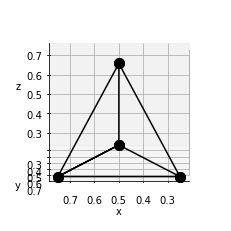

In [6]:
subplot_kw = {'projection':'3d', 'proj_type':'ortho', 'azim': 90, 'elev':15}
fig, ax = plt.subplots(subplot_kw=subplot_kw)
ax.plot(x,y,z,  c='k', marker='o', markersize=10)
ax.set(xlabel='x', ylabel='y', zlabel='z')

0 face
1 line
2 tetra
3 point


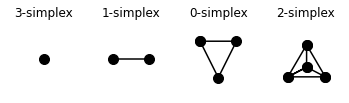

In [7]:
title = "{k}-simplex"
markersize=100
fig, axd = plt.subplot_mosaic([['point', 'line', 'face', 'tetra']], figsize=(6,12))
axd['tetra'].remove()
axd['tetra'] = fig.add_subplot(1,4,4,**subplot_kw)
for k, simplex in enumerate(axd.keys()):
    print(k, simplex)
    axd[simplex].set_title(title.format(k=k))
    if simplex == 'tetra':
        axd[simplex].set(xlim=(.2,.8), ylim=(.2,.8), zlim=(.2,.8))
    else:
        axd[simplex].set(xlim=(0,1), ylim=(0,1), aspect='equal')
        
    axd[simplex].axis('off')
axd['point'].scatter(0.5, 0.5, s=markersize, c='black')
axd['line'].plot([.25, .75], [.5,.5], c='k', marker='o', markersize=markersize/10)
axd['face'].plot([.25, .75, 0.5, .25], [.75, .75, .25, .75], c='k', marker='o', markersize=markersize/10)

axd['tetra'].plot(x, y, z, c='k', marker='o', markersize=markersize/10)
fig.savefig("../sections/math/simplex.png", bbox_inches='tight')

# Möbius strip 
Some topologies are locally trivial 

The Mobius strip is an example of a 


In [10]:
import matplotlib.tri as mtri
# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

In [11]:
tri.edges

array([[  1,   0],
       [  2,   1],
       [  3,   2],
       ...,
       [498, 497],
       [499, 449],
       [499, 498]], dtype=int32)

In [12]:
a = np.linspace(0, 2*np.pi, 1000)
xc = np.cos(a)
yc = np.sin(a)

In [13]:
for t in tri.triangles:
    print (t)
    break

[53  3  4]


[Text(0.5, 0, 'x'), Text(0.5, 0, 'y'), Text(0.5, 0, 'z')]

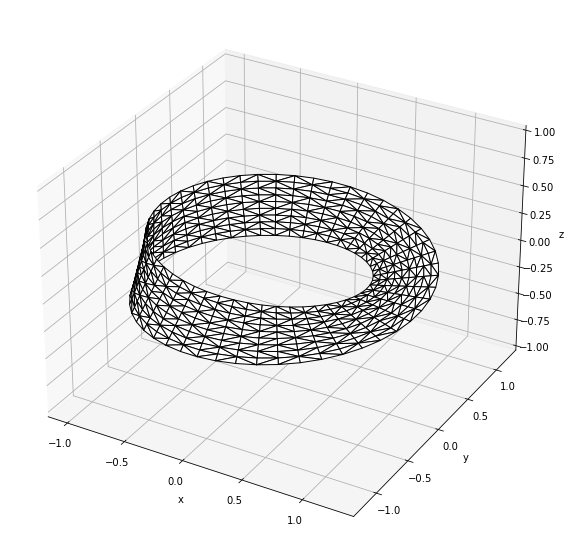

In [14]:
# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
fig, ax = plt.subplots(figsize=(10,10) ,subplot_kw={'projection':'3d'})
ax.plot(xc, yc, 0, color='k', label='simplex')
#ax.quiver(x, y, z, u, v, 0, length=0.1, normalize=True)
strip = ax.plot_trisurf(x, y, z, triangles=tri.triangles)
strip.set_fc('white')
strip.set_ec('black')
#strip.set_ec(list(itertools.chain.from_iterable(colors)))
ax.set()
ax.set_zlim(-1, 1)
ax.set(xlabel='x', ylabel='y', zlabel='z')

# Render $ f: T \rightarrow R^{7}$

In [15]:
import numpy as np
black = (0,0,0)
face_r =  (217,1,102)
face_h = '#d90166'
edge_r = black
edge_h = None

alpha = 1

In [16]:
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev
from matplotlib.path import Path
from matplotlib.patches import PathPatch, Rectangle

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = (0.5 + np.cos(t))
x, y = r * np.cos(t), r * np.sin(t)

err = 0.05 * np.sin(2 * t) ** 2 + 0.04 + 0.02 * np.cos(9 * t + 2)

# calculate normals via derivatives of splines
tck, u = splprep([x, y], s=0)
dx, dy = splev(u, tck, der=1)
l = np.hypot(dx, dy)
nx = dy / l
ny = -dx / l

# end points of errors
xp = x + nx * err
yp = y + ny * err
xn = x - nx * err
yn = y - ny * err

vertices = np.block([[xp, xn[::-1]],
                     [yp, yn[::-1]]]).T
codes = Path.LINETO * np.ones(len(vertices), dtype=Path.code_type)
codes[0] = codes[len(xp)] = Path.MOVETO


In [63]:
sub = 3
columns = ['x', 'y', 'z', 'r', 'g', 'b', 'a']
band = [(f'{xi:.2f}', f'{yi:.2f}', 1, face_r[0], face_r[1], face_r[2], alpha) for xi,yi in vertices[:sub]] 
line = [(f'{xi:.2f}', f'{yi:.2f}', 100, edge_r[0], edge_r[1], edge_r[2], alpha) for xi, yi in zip(x[:sub],y[:sub])]
middle = ['...' for _ in range(7)]
r7 = np.vstack([band, middle, line])


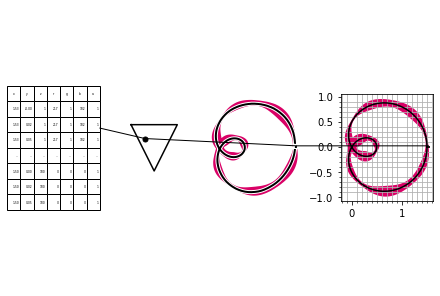

In [64]:
import matplotlib.ticker as mticker
from matplotlib.patches import ConnectionPatch
['bundle', 'simplex', 'ideal', 'screen' ]
fig, axd = plt.subplot_mosaic([['simplex', 'sc']], constrained_layout=True)
axd['bundle'].table(r7,colLabels=columns, loc='center', fontsize=12 )
axd['bundle'].axis('off')

fx, fy = (0.4, 0.6)
axd['simplex'].plot([.25, .75, 0.5, .25], [.75, .75, .25, .75], c='k')
axd['simplex'].scatter(fx, fy, s=25, color='k')
axd['simplex'].set(aspect='equal', xlim=(0,1), ylim=(0,1))
axd['simplex'].axis('off')

with plt.xkcd():
    path = Path(vertices, codes)
    patch = PathPatch(path, facecolor=face_h, edgecolor='none')
    axd['ideal'].add_patch(patch)
    
    rect = Rectangle((vertices[1,0]-.02, vertices[1,1]-.02), .02, .02, facecolor='none', edgecolor='k', zorder=110)
    axd['ideal'].add_patch(rect)
    
    axd['ideal'].plot(x, y, color='k')
    axd['ideal'].set(aspect='equal')
    axd['ideal'].axis('off')


axd['screen'].plot(x, y, color='k')

path = Path(vertices, codes)
patch = PathPatch(path, facecolor=face_h, edgecolor='none')
axd['screen'].add_patch(patch)

rect = Rectangle((vertices[1,0]-.02, vertices[1,1]-.02), .02, .02, facecolor='none', edgecolor='k', zorder=110)
axd['screen'].add_patch(rect)

axd['screen'].set(aspect='equal')
axd['screen'].xaxis.set_minor_locator(mticker.MultipleLocator(.1))
axd['screen'].yaxis.set_minor_locator(mticker.MultipleLocator(.1))
axd['screen'].grid(which='minor')

rxy = (vertices[1,0], vertices[1,1])
con_si = ConnectionPatch(xyA=rxy, coordsA=axd['screen'].transData,
                      xyB=rxy, coordsB=axd['ideal'].transData)
fig.add_artist(con_si)

con_if = ConnectionPatch(xyA=rxy, coordsA=axd['ideal'].transData,
                         xyB=(fx, fy), coordsB=axd['simplex'].transData)
fig.add_artist(con_if)
    
con_ft = ConnectionPatch(xyA=(fx,fy), coordsA=axd['simplex'].transData,
                         xyB=(1, .57), coordsB=axd['bundle'].transData)
fig.add_artist(con_ft)

#fig.savefig("../sections/math/render.png", bbox_inches='tight')